

# **Projeto Final** - Pâmella Vitória Gomes Farias



## 🕵️‍♀️**Classificação**

##⚙️ **Coleta de dados**

In [325]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [326]:
url = "https://raw.githubusercontent.com/PamellaFarias/ProjetoSoftexIA/main/data/spotify-2023.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


*Dataset disponivel em:* https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

##⚙️ **Analisando o df**

###Read

*Visualizando apenas as 5 primeiras linhas do Dataframe*

In [327]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


*Descrição das colunas:*

*   track_name : Nome da música
*   artist(s)_name : Nome do(s) artista(s) da música
*   artist_count : número de artistas que contribuíram para a música
*   release_year : Ano em que a música foi lançada
*   release_month : Mês em que a música foi lançada
*   release_day : Dia do mês em que a música foi lançada
*   in_spotify_playlists : Número de playlists do Spotify nas quais a música está incluída
*   in_spotify_charts : Presença e classificação da música nas paradas do Spotify
*   streams : número total de streams no Spotify
*   in_apple_playlists : número de playlists do Apple Music nas quais a música está incluída
*   in_apple_charts : Presença e classificação da música nas paradas musicais da Apple
*   in_deezer_playlists : Número de playlists do Deezer em que a música está incluída
*   in_deezer_charts : Presença e posição da música nas paradas da Deezer
*   in_shazam_charts : Presença e classificação da música nas paradas do Shazam
*   bpm : Batidas por minuto, uma medida do andamento da música
*   key : tom da música
*   mode : Modo da música (maior ou menor)
*   danceability_% : Porcentagem que indica quão adequada a música é para dançar
*   valence_% : Positividade do conteúdo musical da música
*   energy_% : Nível de energia percebido da música
*   acústico_% : quantidade de som acústico na música
*   instrumentalness_% : Quantidade de conteúdo instrumental na música
*   liveness_% : Presença de elementos de performance ao vivo
*   Speechiness_% : Quantidade de palavras faladas na música




*Informações sobre o Dataset*

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

*Descrição do Dataset*

In [329]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


*Dimensão do dataset*

In [330]:
df.shape

(953, 24)

*Descrição dos índices e colunas*

In [331]:
display(df.index)

display(df.columns)

RangeIndex(start=0, stop=953, step=1)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

*Resumo dos Dados*

In [332]:
print('Soma dos valores do DataFrame',df.sum(),'\n')
print('#Menor valor do DataFrame',df.min(),'\n')
print('#Maior valor',df.max(),'\n')
print('#Média dos valores',df.mean(),'\n')
print('Mediana dos valores',df.median(),'\n')

Soma dos valores do DataFrame track_name              Seven (feat. Latto) (Explicit Ver.)LALAvampire...
artist(s)_name          Latto, Jung KookMyke TowersOlivia RodrigoTaylo...
artist_count                                                         1483
released_year                                                     1923381
released_month                                                       5750
released_day                                                        13276
in_spotify_playlists                                              4955719
in_spotify_charts                                                   11445
streams                 1413817031337162861400039748008408173032363221...
in_apple_playlists                                                  64625
in_apple_charts                                                     49469
in_deezer_playlists     4558911258788433048665421745182863161789554231...
in_deezer_charts                                                     2541
bpm     

<ipython-input-332-b935af0efd19>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Soma dos valores do DataFrame',df.sum(),'\n')
<ipython-input-332-b935af0efd19>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('#Menor valor do DataFrame',df.min(),'\n')
<ipython-input-332-b935af0efd19>:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of

*Verificando a existência de valores nulos*

In [333]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [334]:
df_clean= df.copy()

In [335]:
df_clean = df_clean.replace(to_replace='None', value=np.nan).dropna()

In [336]:
#Visualizar os tipos de dados
df_clean.dtypes


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [337]:
df_clean.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

*As colunas 'in_shazam_charts', in_deezer_playlists', terão o tipo alterado de object para inteiro*

In [338]:
colunas_para_converter = ['in_shazam_charts', 'in_deezer_playlists']

for coluna in colunas_para_converter:
    df_clean[coluna] = df_clean[coluna].str.replace(',', '').astype(int)

In [339]:
df_clean.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [340]:
colunas_desejadas = ['track_name', 'in_shazam_charts','streams', 'mode', 'key', 'in_deezer_playlists']

# Realizar value counts para cada coluna
for coluna in colunas_desejadas:
    counts = df_clean[coluna].value_counts()
    print(f"\nValue Counts para a coluna '{coluna}':\n{counts}")


Value Counts para a coluna 'track_name':
Miss You                                  2
Die For You                               2
Take My Breath                            2
About Damn Time                           2
Let It Snow! Let It Snow! Let It Snow!    2
                                         ..
Something in the Orange                   1
VOID                                      1
Dijeron Que No La Iba Lograr              1
If We Ever Broke Up                       1
Alone                                     1
Name: track_name, Length: 811, dtype: int64

Value Counts para a coluna 'in_shazam_charts':
0       309
1        69
2        30
3        21
5        15
       ... 
429       1
1170      1
1451      1
323       1
95        1
Name: in_shazam_charts, Length: 187, dtype: int64

Value Counts para a coluna 'streams':
1223481149    2
156338624     2
723894473     2
135079152     1
258316038     1
             ..
116334601     1
165584767     1
367814306     1
477033549     1
9

*One-Hot Encoding:*

In [341]:
df_clean[['track_name','in_shazam_charts','streams','mode', 'key', 'in_deezer_playlists']]

,track_name,in_shazam_charts,streams,mode,key,in_deezer_playlists
0,Seven (feat. Latto) (Explicit Ver.),826,141381703,Major,B,45
1,LALA,382,133716286,Major,C#,58
2,vampire,949,140003974,Major,F,91
3,Cruel Summer,548,800840817,Major,A,125
4,WHERE SHE GOES,425,303236322,Minor,A,87
...,...,...,...,...,...,...
948,My Mind & Me,0,91473363,Major,A,37
949,Bigger Than The Whole Sky,0,121871870,Major,F#,8
950,A Veces (feat. Feid),0,73513683,Major,C#,7
951,En La De Ella,0,133895612,Major,C#,17


*One hot encoder nas colunas key e mode*

In [342]:
df_clean

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [343]:
# Cria o transformador de coluna
column_transformer = make_column_transformer((OneHotEncoder(), ['key']), remainder='passthrough')
df_clean = column_transformer.fit_transform(df)

df_clean = pd.DataFrame(data=df_clean, columns=column_transformer.get_feature_names_out())



In [344]:
df_clean.columns

Index(['onehotencoder__key_A', 'onehotencoder__key_A#', 'onehotencoder__key_B',
       'onehotencoder__key_C#', 'onehotencoder__key_D',
       'onehotencoder__key_D#', 'onehotencoder__key_E', 'onehotencoder__key_F',
       'onehotencoder__key_F#', 'onehotencoder__key_G',
       'onehotencoder__key_G#', 'onehotencoder__key_nan',
       'remainder__track_name', 'remainder__artist(s)_name',
       'remainder__artist_count', 'remainder__released_year',
       'remainder__released_month', 'remainder__released_day',
       'remainder__in_spotify_playlists', 'remainder__in_spotify_charts',
       'remainder__streams', 'remainder__in_apple_playlists',
       'remainder__in_apple_charts', 'remainder__in_deezer_playlists',
       'remainder__in_deezer_charts', 'remainder__in_shazam_charts',
       'remainder__bpm', 'remainder__mode', 'remainder__danceability_%',
       'remainder__valence_%', 'remainder__energy_%',
       'remainder__acousticness_%', 'remainder__instrumentalness_%',
       'rema

*Retirando valores nulos*

In [345]:
df_clean2 = df_clean.copy()

In [346]:
df_clean2 = df_clean2.dropna()

In [347]:
df_clean2.isnull().sum()

onehotencoder__key_A               0
onehotencoder__key_A#              0
onehotencoder__key_B               0
onehotencoder__key_C#              0
onehotencoder__key_D               0
onehotencoder__key_D#              0
onehotencoder__key_E               0
onehotencoder__key_F               0
onehotencoder__key_F#              0
onehotencoder__key_G               0
onehotencoder__key_G#              0
onehotencoder__key_nan             0
remainder__track_name              0
remainder__artist(s)_name          0
remainder__artist_count            0
remainder__released_year           0
remainder__released_month          0
remainder__released_day            0
remainder__in_spotify_playlists    0
remainder__in_spotify_charts       0
remainder__streams                 0
remainder__in_apple_playlists      0
remainder__in_apple_charts         0
remainder__in_deezer_playlists     0
remainder__in_deezer_charts        0
remainder__in_shazam_charts        0
remainder__bpm                     0
r

In [348]:
df_clean2

,onehotencoder__key_A,onehotencoder__key_A#,onehotencoder__key_B,onehotencoder__key_C#,onehotencoder__key_D,onehotencoder__key_D#,onehotencoder__key_E,onehotencoder__key_F,onehotencoder__key_F#,onehotencoder__key_G,...,remainder__in_shazam_charts,remainder__bpm,remainder__mode,remainder__danceability_%,remainder__valence_%,remainder__energy_%,remainder__acousticness_%,remainder__instrumentalness_%,remainder__liveness_%,remainder__speechiness_%
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,826,125,Major,80,89,83,31,0,8,4
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,382,92,Major,71,61,74,7,0,10,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,949,138,Major,51,32,53,17,0,31,6
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,548,170,Major,55,58,72,11,0,11,15
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,425,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,144,Major,60,24,39,57,0,8,3
949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,166,Major,42,7,24,83,1,12,6
950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,92,Major,80,81,67,4,0,8,6
951,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,97,Major,82,67,77,8,0,12,5


In [349]:
df_clean2.dtypes

onehotencoder__key_A               object
onehotencoder__key_A#              object
onehotencoder__key_B               object
onehotencoder__key_C#              object
onehotencoder__key_D               object
onehotencoder__key_D#              object
onehotencoder__key_E               object
onehotencoder__key_F               object
onehotencoder__key_F#              object
onehotencoder__key_G               object
onehotencoder__key_G#              object
onehotencoder__key_nan             object
remainder__track_name              object
remainder__artist(s)_name          object
remainder__artist_count            object
remainder__released_year           object
remainder__released_month          object
remainder__released_day            object
remainder__in_spotify_playlists    object
remainder__in_spotify_charts       object
remainder__streams                 object
remainder__in_apple_playlists      object
remainder__in_apple_charts         object
remainder__in_deezer_playlists    

In [350]:
# Colunas a serem normalizadas
colunas_para_normalizar = [
    'remainder__artist_count', 'remainder__released_year',
    'remainder__released_month', 'remainder__released_day',
    'remainder__in_spotify_playlists', 'remainder__in_spotify_charts',
    'remainder__in_apple_playlists',
    'remainder__in_apple_charts', 'remainder__in_deezer_playlists',
    'remainder__in_deezer_charts', 'remainder__in_shazam_charts',
    'remainder__bpm', 'remainder__danceability_%',
    'remainder__valence_%', 'remainder__energy_%',
    'remainder__acousticness_%', 'remainder__instrumentalness_%',
    'remainder__liveness_%', 'remainder__speechiness_%'
]

for coluna in colunas_para_normalizar:
    df_clean2[coluna] = pd.to_numeric(df_clean2[coluna].astype(str).str.replace(',', ''), errors='coerce')

# Normalizar as colunas
df_clean2[colunas_para_normalizar] = MinMaxScaler().fit_transform(df_clean2[colunas_para_normalizar])

df_clean2.head()


,onehotencoder__key_A,onehotencoder__key_A#,onehotencoder__key_B,onehotencoder__key_C#,onehotencoder__key_D,onehotencoder__key_D#,onehotencoder__key_E,onehotencoder__key_F,onehotencoder__key_F#,onehotencoder__key_G,...,remainder__in_shazam_charts,remainder__bpm,remainder__mode,remainder__danceability_%,remainder__valence_%,remainder__energy_%,remainder__acousticness_%,remainder__instrumentalness_%,remainder__liveness_%,remainder__speechiness_%
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569263,0.425532,Major,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.263267,0.191489,Major,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.654032,0.517730,Major,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.377671,0.744681,Major,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.292901,0.560284,Minor,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


In [351]:
df_clean2.columns

Index(['onehotencoder__key_A', 'onehotencoder__key_A#', 'onehotencoder__key_B',
       'onehotencoder__key_C#', 'onehotencoder__key_D',
       'onehotencoder__key_D#', 'onehotencoder__key_E', 'onehotencoder__key_F',
       'onehotencoder__key_F#', 'onehotencoder__key_G',
       'onehotencoder__key_G#', 'onehotencoder__key_nan',
       'remainder__track_name', 'remainder__artist(s)_name',
       'remainder__artist_count', 'remainder__released_year',
       'remainder__released_month', 'remainder__released_day',
       'remainder__in_spotify_playlists', 'remainder__in_spotify_charts',
       'remainder__streams', 'remainder__in_apple_playlists',
       'remainder__in_apple_charts', 'remainder__in_deezer_playlists',
       'remainder__in_deezer_charts', 'remainder__in_shazam_charts',
       'remainder__bpm', 'remainder__mode', 'remainder__danceability_%',
       'remainder__valence_%', 'remainder__energy_%',
       'remainder__acousticness_%', 'remainder__instrumentalness_%',
       'rema

In [352]:
df_clean2.isnull().sum()

onehotencoder__key_A               0
onehotencoder__key_A#              0
onehotencoder__key_B               0
onehotencoder__key_C#              0
onehotencoder__key_D               0
onehotencoder__key_D#              0
onehotencoder__key_E               0
onehotencoder__key_F               0
onehotencoder__key_F#              0
onehotencoder__key_G               0
onehotencoder__key_G#              0
onehotencoder__key_nan             0
remainder__track_name              0
remainder__artist(s)_name          0
remainder__artist_count            0
remainder__released_year           0
remainder__released_month          0
remainder__released_day            0
remainder__in_spotify_playlists    0
remainder__in_spotify_charts       0
remainder__streams                 0
remainder__in_apple_playlists      0
remainder__in_apple_charts         0
remainder__in_deezer_playlists     0
remainder__in_deezer_charts        0
remainder__in_shazam_charts        0
remainder__bpm                     0
r

*Label Encoder*

In [353]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_clean2['remainder__mode']= label_encoder.fit_transform(df_clean2['remainder__mode'])

df_clean2.head()

,onehotencoder__key_A,onehotencoder__key_A#,onehotencoder__key_B,onehotencoder__key_C#,onehotencoder__key_D,onehotencoder__key_D#,onehotencoder__key_E,onehotencoder__key_F,onehotencoder__key_F#,onehotencoder__key_G,...,remainder__in_shazam_charts,remainder__bpm,remainder__mode,remainder__danceability_%,remainder__valence_%,remainder__energy_%,remainder__acousticness_%,remainder__instrumentalness_%,remainder__liveness_%,remainder__speechiness_%
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569263,0.425532,0,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.263267,0.191489,0,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.654032,0.517730,0,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.377671,0.744681,0,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.292901,0.560284,1,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


*Separar os dados de treinamento e teste (80% e 20%)*

In [354]:
df_clean2.isnull().sum()

onehotencoder__key_A               0
onehotencoder__key_A#              0
onehotencoder__key_B               0
onehotencoder__key_C#              0
onehotencoder__key_D               0
onehotencoder__key_D#              0
onehotencoder__key_E               0
onehotencoder__key_F               0
onehotencoder__key_F#              0
onehotencoder__key_G               0
onehotencoder__key_G#              0
onehotencoder__key_nan             0
remainder__track_name              0
remainder__artist(s)_name          0
remainder__artist_count            0
remainder__released_year           0
remainder__released_month          0
remainder__released_day            0
remainder__in_spotify_playlists    0
remainder__in_spotify_charts       0
remainder__streams                 0
remainder__in_apple_playlists      0
remainder__in_apple_charts         0
remainder__in_deezer_playlists     0
remainder__in_deezer_charts        0
remainder__in_shazam_charts        0
remainder__bpm                     0
r

In [355]:
df_clean2.dtypes

onehotencoder__key_A                object
onehotencoder__key_A#               object
onehotencoder__key_B                object
onehotencoder__key_C#               object
onehotencoder__key_D                object
onehotencoder__key_D#               object
onehotencoder__key_E                object
onehotencoder__key_F                object
onehotencoder__key_F#               object
onehotencoder__key_G                object
onehotencoder__key_G#               object
onehotencoder__key_nan              object
remainder__track_name               object
remainder__artist(s)_name           object
remainder__artist_count            float64
remainder__released_year           float64
remainder__released_month          float64
remainder__released_day            float64
remainder__in_spotify_playlists    float64
remainder__in_spotify_charts       float64
remainder__streams                  object
remainder__in_apple_playlists      float64
remainder__in_apple_charts         float64
remainder__

In [356]:
df_clean2.head()

,onehotencoder__key_A,onehotencoder__key_A#,onehotencoder__key_B,onehotencoder__key_C#,onehotencoder__key_D,onehotencoder__key_D#,onehotencoder__key_E,onehotencoder__key_F,onehotencoder__key_F#,onehotencoder__key_G,...,remainder__in_shazam_charts,remainder__bpm,remainder__mode,remainder__danceability_%,remainder__valence_%,remainder__energy_%,remainder__acousticness_%,remainder__instrumentalness_%,remainder__liveness_%,remainder__speechiness_%
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.569263,0.425532,0,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.263267,0.191489,0,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.654032,0.517730,0,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.377671,0.744681,0,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.292901,0.560284,1,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


In [357]:
df_clean2['remainder__streams'] = pd.to_numeric(df_clean2['remainder__streams'], errors='coerce', downcast='integer')

In [358]:
df_clean2.dropna(inplace=True)

##⚙️ **Treinamento de modelos**

In [359]:
y = df_clean2['remainder__mode']

colunas_para_remover = ['remainder__mode','remainder__artist(s)_name', 'remainder__track_name']

X = df_clean2.drop(colunas_para_remover, axis=1)


In [360]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None) # 80% treino e 20% teste

In [361]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion="entropy")
model2 = KNeighborsClassifier(n_neighbors=7, metric='euclidean', algorithm='brute')
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model4 = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [362]:
from sklearn import metrics

result1 = model1.predict(X_test)
result2 = model2.predict(X_test)
result3 = model3.predict(X_test)
result4 = model4.predict(X_test)

acc1 = metrics.accuracy_score(result1, y_test)
show1 = round(acc1 * 100)
print("{}%".format(show1))

acc2 = metrics.accuracy_score(result2, y_test)
show2 = round(acc2 * 100)
print("{}%".format(show2))

acc3 = metrics.accuracy_score(result3, y_test)
show3 = round(acc3 * 100)
print("{}%".format(show3))

acc4 = metrics.accuracy_score(result4, y_test)
show4 = round(acc4 * 100)
print("{}%".format(show4))

54%
51%
45%
49%


In [363]:
model5 = MLPClassifier(hidden_layer_sizes=(3,2), activation='tanh',max_iter=2000)
model5 = model5.fit(X_train, y_train)

In [364]:
result5 = model5.predict(X_test)
acc5 = metrics.accuracy_score(result5, y_test)
show = round(acc5 * 100)
print("{}%".format(show))

print(list(result5))
print(list(y_test))


65%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0

In [365]:
###############
# Parâmetros da Rede
###############

print("Número de classes:",model5.classes_,"\n")
print("Número de camadas:",model5.n_layers_,"\n")
print("Número de saídas:",model5.n_outputs_,"\n")

print("Tamanho do vetor de pesos:",len(model5.coefs_),"\n")
print("Pesos da camada de entrada:\n",model5.coefs_[0],"\n")

print("Tamanho do vetor dos limiares (bias):",len(model5.intercepts_),"\n")
print("Pesos omega (limiar):\n",model5.intercepts_[0],"\n")

Número de classes: [0 1] 

Número de camadas: 4 

Número de saídas: 1 

Tamanho do vetor de pesos: 3 

Pesos da camada de entrada:
 [[-1.02418413e-01  1.11041453e-03 -4.74451766e-03]
 [ 9.62981525e-04  3.57066740e-04 -7.35610280e-02]
 [ 4.08233960e-03 -5.55440864e-04 -2.04173565e-07]
 [ 1.12689195e-02 -8.83155606e-02 -1.84116632e-03]
 [ 2.63694584e-02  1.06284209e-01 -6.40670301e-02]
 [ 6.21424511e-02  1.81767095e-02  1.40752941e-03]
 [-3.50124318e-02 -4.76712735e-02  2.01732726e-03]
 [ 1.49421332e-04  1.06449419e-02 -6.04143129e-02]
 [ 7.10314147e-04 -6.18144234e-05  8.15957309e-03]
 [ 1.20544028e-02  1.08543662e-09 -4.81524024e-03]
 [ 8.88078661e-02 -2.60740086e-02 -6.75149372e-02]
 [ 5.22866644e-03  4.92442121e-04  1.09858414e-01]
 [-6.96169670e-04 -2.10134369e-04 -9.43348802e-02]
 [ 1.00180608e-02  1.91059676e-03  3.07404757e-02]
 [-7.68671692e-03 -5.15302129e-02  1.11541296e-01]
 [-4.52372584e-05  1.11934014e-01 -5.30781955e-04]
 [-8.17425309e-10  3.97877926e-10 -2.66116930e-07]
 

In [366]:
model6 = MLPClassifier(hidden_layer_sizes=(5,2), activation='tanh',max_iter=1000)
model6 = model6.fit(X_train, y_train)

In [367]:
result6 = model6.predict(X_test)
acc6 = metrics.accuracy_score(result6, y_test)
show = round(acc6 * 100)
print("{}%".format(show))

print(list(result6))
print(list(y_test))

65%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0

In [368]:
###############
# Parâmetros da Rede
###############

print("Número de classes:",model6.classes_,"\n")
print("Número de camadas:",model6.n_layers_,"\n")
print("Número de saídas:",model6.n_outputs_,"\n")

print("Tamanho do vetor de pesos:",len(model6.coefs_),"\n")
print("Pesos da camada de entrada:\n",model6.coefs_[0],"\n")

print("Tamanho do vetor dos limiares (bias):",len(model6.intercepts_),"\n")
print("Pesos omega (limiar):\n",model6.intercepts_[0],"\n")

Número de classes: [0 1] 

Número de camadas: 4 

Número de saídas: 1 

Tamanho do vetor de pesos: 3 

Pesos da camada de entrada:
 [[ 0.17984998  0.11294474 -0.17631372  0.17717663  0.20719217]
 [-0.31029394 -0.22094003  0.00814839 -0.21134145  0.13488058]
 [ 0.11535308  0.1548935   0.23765917 -0.11852996 -0.02613074]
 [ 0.25230692 -0.15173725 -0.03255028  0.10041345  0.31139974]
 [ 0.3006095   0.20847772  0.21062206  0.15331812 -0.23919413]
 [ 0.0645796   0.02784049  0.21779973 -0.09639777 -0.23456156]
 [ 0.08365778 -0.34887155 -0.16254583 -0.08004689  0.21110795]
 [ 0.29643329  0.30559929  0.2036617   0.3045269   0.15773377]
 [-0.21832757  0.00206302  0.29200971 -0.11632489 -0.02377029]
 [-0.25585279 -0.16524706  0.29392433  0.17548807 -0.16768525]
 [-0.01178598  0.30632668  0.05204826  0.2562893   0.28007766]
 [ 0.12400478  0.07312327 -0.16610309  0.19103827  0.00768897]
 [-0.14888595 -0.17657147  0.07861579  0.01110895 -0.00690884]
 [ 0.04923089 -0.35417919 -0.14270331 -0.00442166

*RandomForest*

In [369]:

from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

resultRF = modelRF.predict(X_test)

accRF = metrics.accuracy_score(resultRF, y_test)

showRF = round(accRF * 100)
print("RandomForest: {}%".format(showRF))

RandomForest: 65%


*GradientBoosting*

In [370]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y_train)

resultGB = modelGB.predict(X_test)

accGB = metrics.accuracy_score(resultGB, y_test)

showGB = round(accGB * 100)
print("GradientBoosting: {}%".format(showGB))

GradientBoosting: 66%


*train test split 10 vezes randomicamente*

In [371]:
modelo = DecisionTreeClassifier()
porcentagem_acuracia = []
# Executar o Train-Test-Split 10 vezes
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    modelo.fit(X_train, y_train)
    previsoes = modelo.predict(X_test)
    acuracia = metrics.accuracy_score(y_test, previsoes)
    porcentagem_acuracia = round(acuracia * 100, 2)
    print(f'Acurácia na execução {i + 1}: {porcentagem_acuracia}%')
    media_acuracias = np.mean(porcentagem_acuracia)
print(f'Média das acurácias: {round(media_acuracias, 10)}%')

Acurácia na execução 1: 60.77%
Acurácia na execução 2: 56.91%
Acurácia na execução 3: 58.01%
Acurácia na execução 4: 53.59%
Acurácia na execução 5: 49.17%
Acurácia na execução 6: 56.35%
Acurácia na execução 7: 56.35%
Acurácia na execução 8: 59.67%
Acurácia na execução 9: 55.8%
Acurácia na execução 10: 53.59%
Média das acurácias: 53.59%


*Média das execuções*

In [372]:
media_acuracias = np.mean(acuracias)

print(f'Média das acurácias: {round(media_acuracias * 100, 3)}%')

Média das acurácias: nan%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


##⚙️ **Gráficos**

In [373]:
df_clean2.columns

Index(['onehotencoder__key_A', 'onehotencoder__key_A#', 'onehotencoder__key_B',
       'onehotencoder__key_C#', 'onehotencoder__key_D',
       'onehotencoder__key_D#', 'onehotencoder__key_E', 'onehotencoder__key_F',
       'onehotencoder__key_F#', 'onehotencoder__key_G',
       'onehotencoder__key_G#', 'onehotencoder__key_nan',
       'remainder__track_name', 'remainder__artist(s)_name',
       'remainder__artist_count', 'remainder__released_year',
       'remainder__released_month', 'remainder__released_day',
       'remainder__in_spotify_playlists', 'remainder__in_spotify_charts',
       'remainder__streams', 'remainder__in_apple_playlists',
       'remainder__in_apple_charts', 'remainder__in_deezer_playlists',
       'remainder__in_deezer_charts', 'remainder__in_shazam_charts',
       'remainder__bpm', 'remainder__mode', 'remainder__danceability_%',
       'remainder__valence_%', 'remainder__energy_%',
       'remainder__acousticness_%', 'remainder__instrumentalness_%',
       'rema

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      1
      ..
948    0
949    0
950    0
951    0
952    1
Name: remainder__mode, Length: 902, dtype: int64>

In [390]:
df_clean.columns

Index(['onehotencoder__key_A', 'onehotencoder__key_A#', 'onehotencoder__key_B',
       'onehotencoder__key_C#', 'onehotencoder__key_D',
       'onehotencoder__key_D#', 'onehotencoder__key_E', 'onehotencoder__key_F',
       'onehotencoder__key_F#', 'onehotencoder__key_G',
       'onehotencoder__key_G#', 'onehotencoder__key_nan',
       'remainder__track_name', 'remainder__artist(s)_name',
       'remainder__artist_count', 'remainder__released_year',
       'remainder__released_month', 'remainder__released_day',
       'remainder__in_spotify_playlists', 'remainder__in_spotify_charts',
       'remainder__streams', 'remainder__in_apple_playlists',
       'remainder__in_apple_charts', 'remainder__in_deezer_playlists',
       'remainder__in_deezer_charts', 'remainder__in_shazam_charts',
       'remainder__bpm', 'remainder__mode', 'remainder__danceability_%',
       'remainder__valence_%', 'remainder__energy_%',
       'remainder__acousticness_%', 'remainder__instrumentalness_%',
       'rema

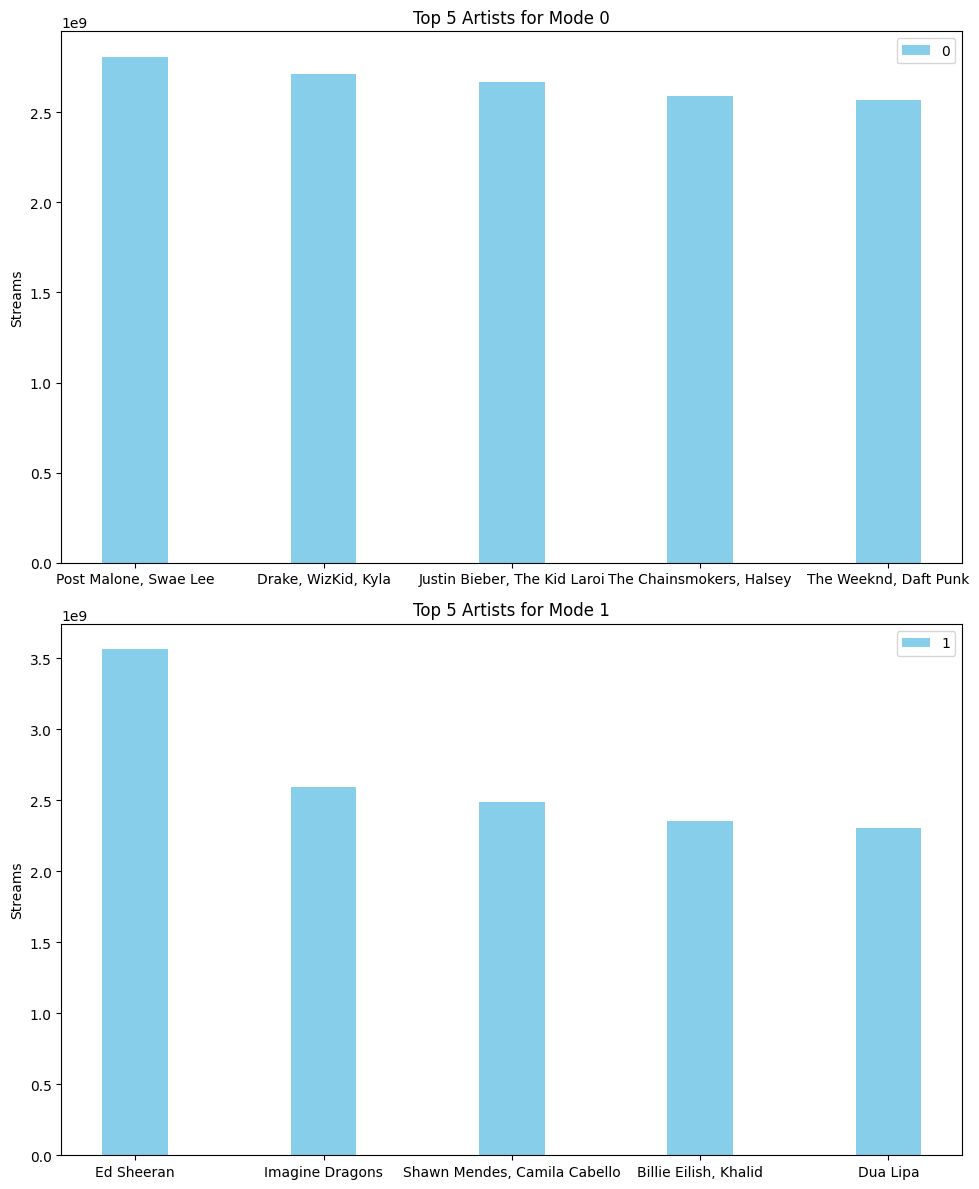

In [392]:
# Calcular os 5 artistas com mais streams para cada modo
top_artists_by_mode = df_clean2.groupby('remainder__mode').apply(lambda x: x.nlargest(5, 'remainder__streams')).reset_index(drop=True)

# Plotar o gráfico de barras
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Ajustei o tamanho do gráfico

for i, (mode, data) in enumerate(top_artists_by_mode.groupby('remainder__mode')):
    bar_width = 0.35  # Ajuste a largura das barras
    bar_positions = range(len(data['remainder__artist(s)_name']))

    axes[i].bar(bar_positions, data['remainder__streams'], width=bar_width, color='skyblue')
    axes[i].set_title(f'Top 5 Artists for Mode {mode}')
    axes[i].set_ylabel('Streams')

    # Ajuste para exibir remainder__mode na legenda
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(data['remainder__artist(s)_name'])
    axes[i].legend([mode])

plt.tight_layout()
plt.show()